In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv(r"C:\Users\dell\Downloads\loans_full_schema.csv")

In [19]:
data.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [20]:
data.shape

(10000, 55)

In [24]:
data_crosstab = pd.crosstab(data['application_type'], data['homeownership'])
data_crosstab['Total'] = data_crosstab.sum(axis=1)
data_crosstab.loc['Total'] = data_crosstab.sum()
print(data_crosstab)


homeownership     MORTGAGE   OWN  RENT  Total
application_type                             
individual            3839  1170  3496   8505
joint                  950   183   362   1495
Total                 4789  1353  3858  10000


In [39]:
df = data['homeownership'].value_counts()
df.loc['Total'] = df.sum()
df = df.to_frame(name='Count')


# Style the DataFrame
styled_df = df.style.set_table_styles(
    [
        {'selector': 'th', 'props': [('background-color', '#f7f7f9'), ('font-weight', 'bold'), ('border', '1px solid black')]},
        {'selector': 'td', 'props': [('border', '1px solid black'), ('padding', '8px')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]}
    ]
).set_caption('A table summarizing the frequencies for each value of the homeownership variable:mortgage, own, and rent.') \
 .set_properties(**{'text-align': 'center'}) \
 .format(na_rep='-')


styled_df


,Count
homeownership,
MORTGAGE,4789
RENT,3858
OWN,1353
Total,10000


## Two bar plots: the left panel shows the counts and the right panel shows the proportions of values of the homeownership variable.

C:\Users\dell\AppData\Local\Temp\ipykernel_4520\3091431918.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['homeownership'], palette='Dark2', ax=axes[0])
C:\Users\dell\AppData\Local\Temp\ipykernel_4520\3091431918.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='homeownership', y='proportion', data=homeownership_proportion_df, palette='Dark2', ax=axes[1])


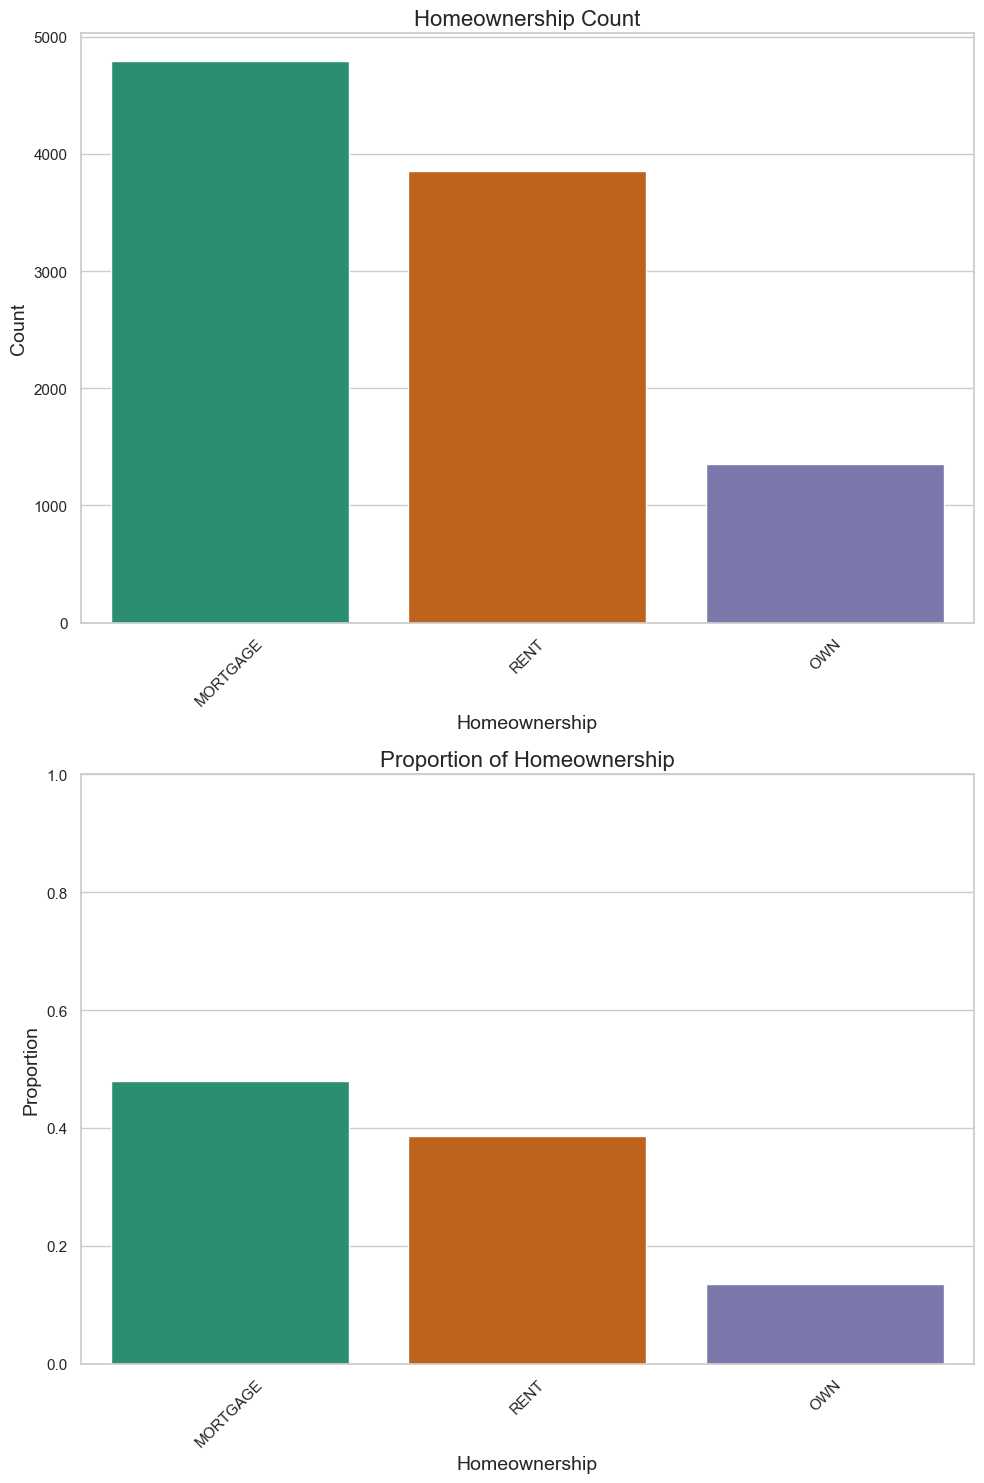

In [54]:
sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 1, figsize=(10, 15))


sns.countplot(x=data['homeownership'], palette='Dark2', ax=axes[0])
axes[0].set_title('Homeownership Count', fontsize=16)
axes[0].set_xlabel('Homeownership', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)


homeownership_proportion = data['homeownership'].value_counts(normalize=True)
homeownership_proportion_df = homeownership_proportion.reset_index()
homeownership_proportion_df.columns = ['homeownership', 'proportion']

sns.barplot(x='homeownership', y='proportion', data=homeownership_proportion_df, palette='Dark2', ax=axes[1])
axes[1].set_title('Proportion of Homeownership', fontsize=16)
axes[1].set_xlabel('Homeownership', fontsize=14)
axes[1].set_ylabel('Proportion', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 1)

# Display the plots
plt.tight_layout()
plt.show()

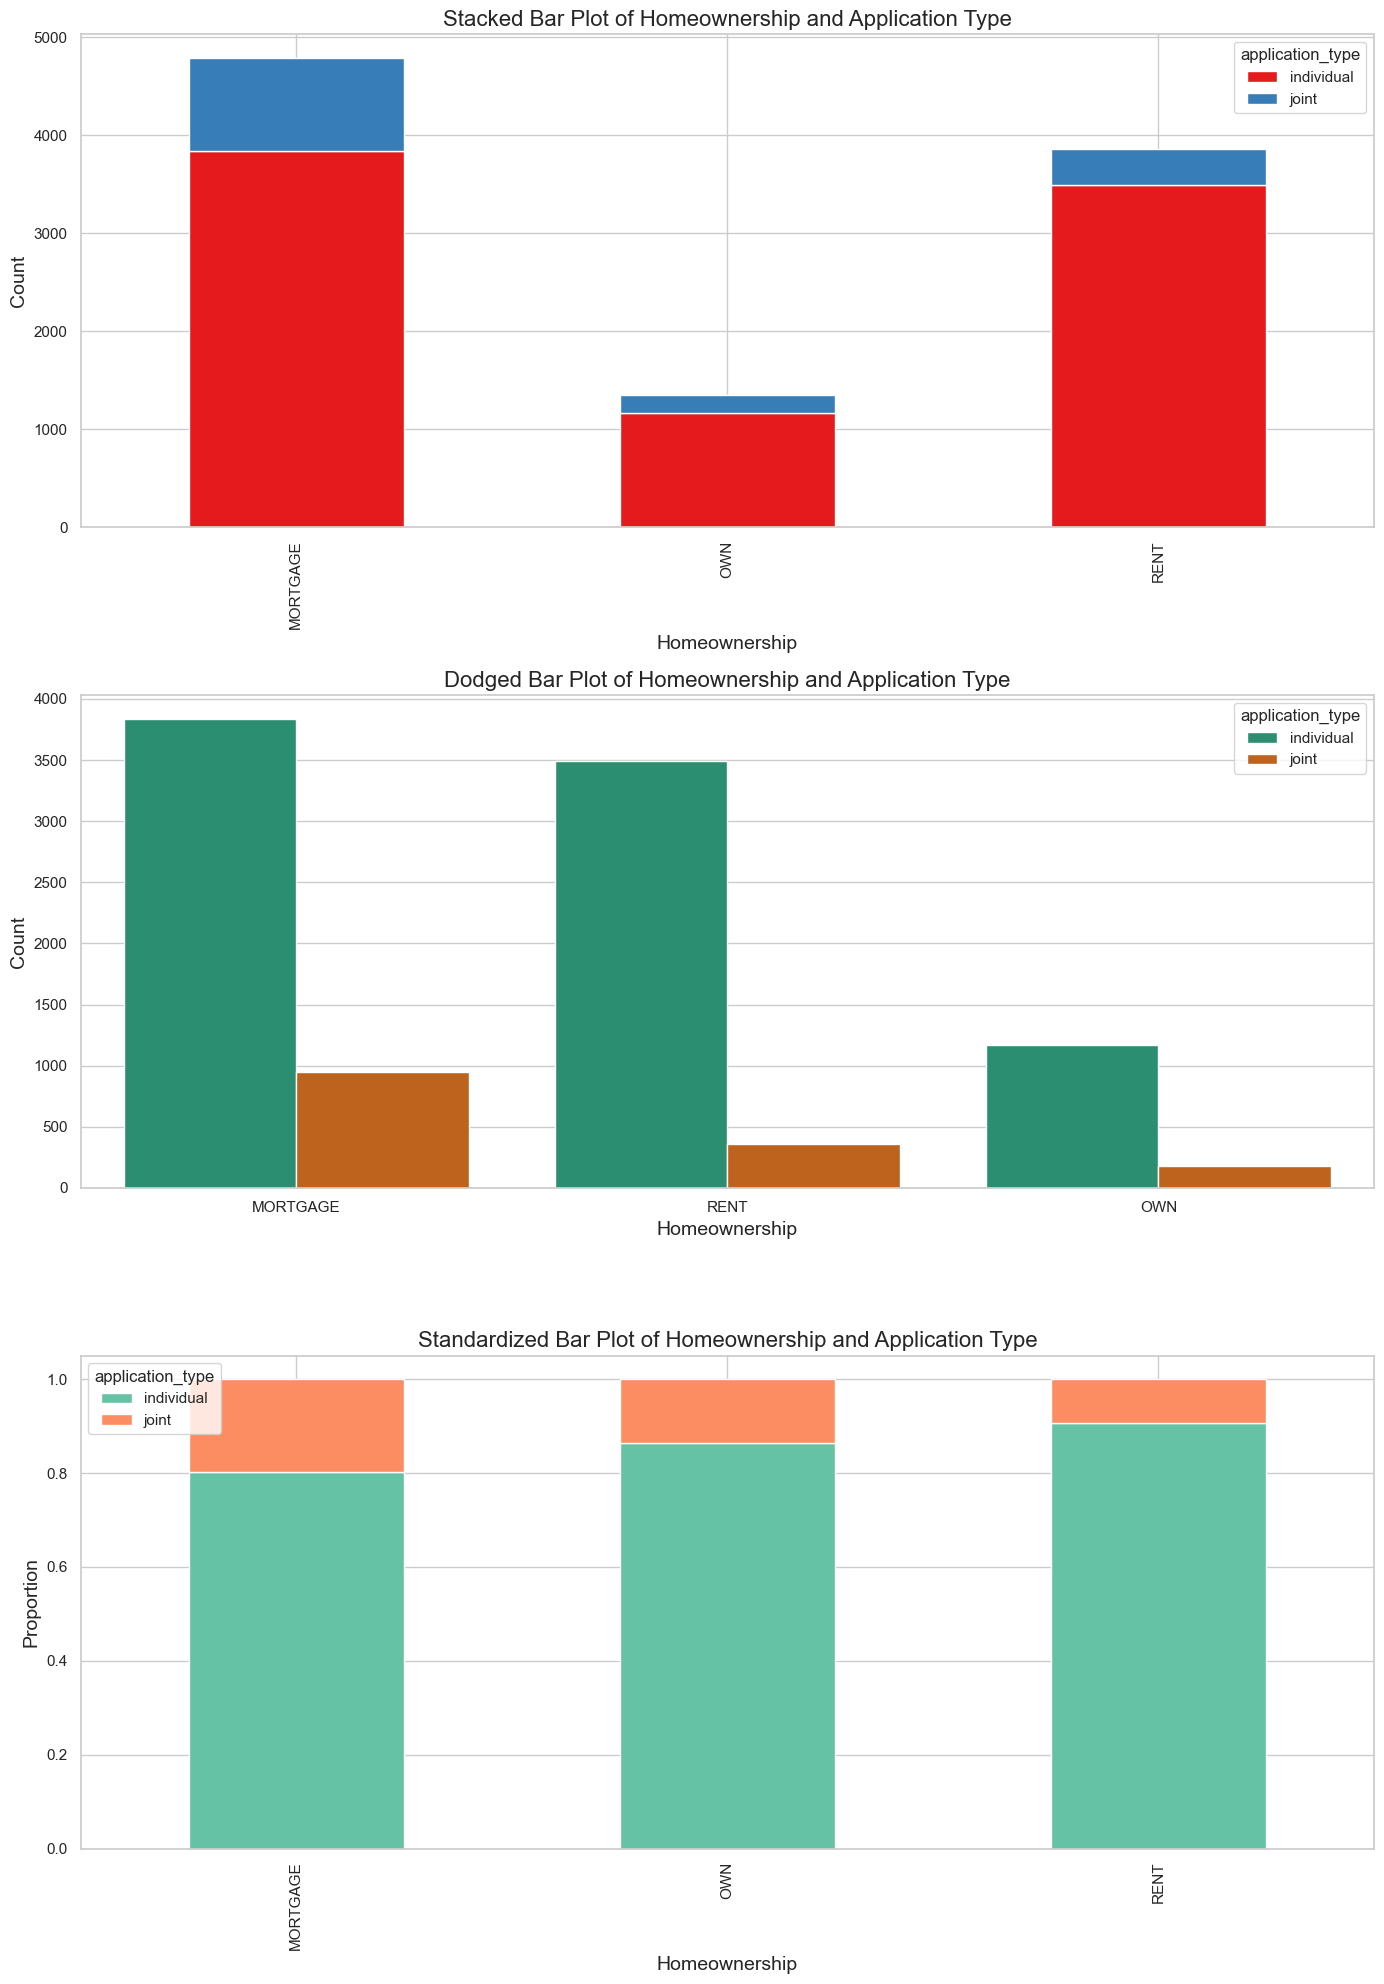

In [59]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(14, 20))

# Stacked Bar Plot
crosstab_stacked = pd.crosstab(data['homeownership'], data['application_type'])
crosstab_stacked.plot(kind='bar', stacked=True, ax=axes[0], color=sns.color_palette('Set1'))
axes[0].set_title('Stacked Bar Plot of Homeownership and Application Type', fontsize=16)
axes[0].set_xlabel('Homeownership', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)

# Dodged Bar Plot
sns.countplot(x='homeownership', hue='application_type', data=data, palette='Dark2', ax=axes[1])
axes[1].set_title('Dodged Bar Plot of Homeownership and Application Type', fontsize=16)
axes[1].set_xlabel('Homeownership', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

# Standardized Bar Plot
crosstab_standardized = crosstab_stacked.div(crosstab_stacked.sum(axis=1), axis=0)
crosstab_standardized.plot(kind='bar', stacked=True, ax=axes[2], color=sns.color_palette('Set2'))
axes[2].set_title('Standardized Bar Plot of Homeownership and Application Type', fontsize=16)
axes[2].set_xlabel('Homeownership', fontsize=14)
axes[2].set_ylabel('Proportion', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

#### The mosaic plots: one for homeownership alone and the other displaying the relationship between homeownership and application type.

<Figure size 1000x800 with 0 Axes>

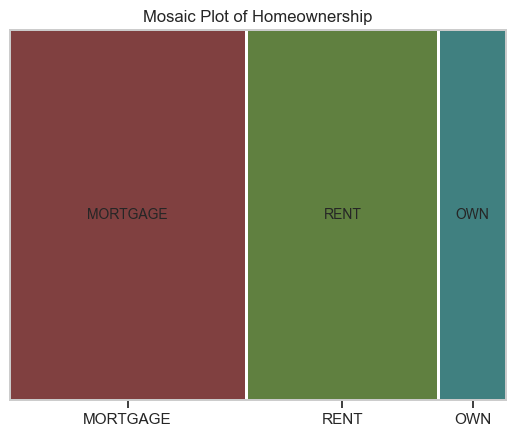

<Figure size 1000x800 with 0 Axes>

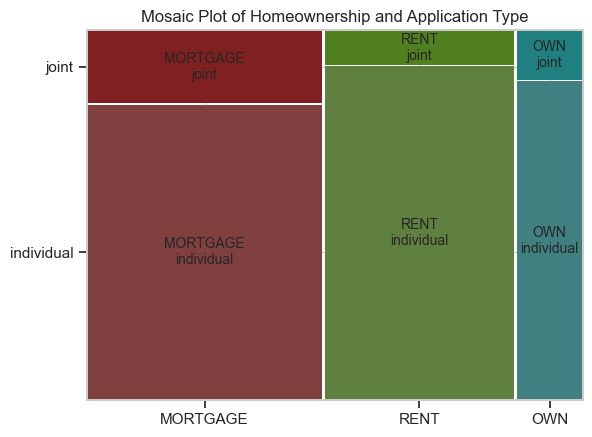

In [70]:
# Function to create and display mosaic plot
def create_mosaic_plot(data, columns, title):
    plt.figure(figsize=(10, 8))
    mosaic(data, columns, title=title)
    plt.show()

# Mosaic Plot for Homeownership alone
create_mosaic_plot(data, ['homeownership'], 'Mosaic Plot of Homeownership')

# Mosaic Plot for Homeownership and Application Type
create_mosaic_plot(data, ['homeownership', 'application_type'], 'Mosaic Plot of Homeownership and Application Type')

<Figure size 1000x800 with 0 Axes>

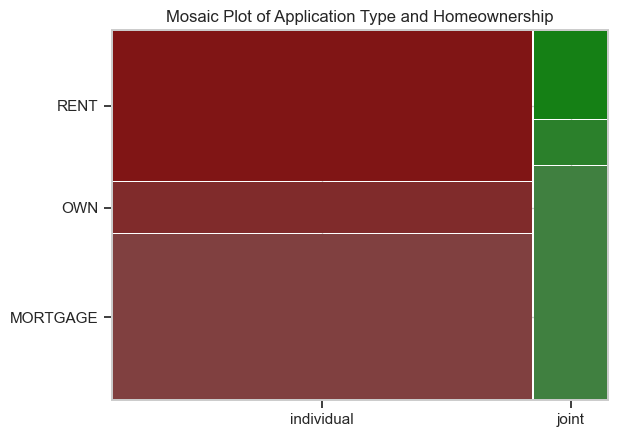

In [75]:
data_crosstab = pd.crosstab(data['application_type'], data['homeownership'])
def labelizer(key):
    return ''
# Plotting mosaic plot
plt.figure(figsize=(10, 8))
mosaic(data_crosstab.stack(), title='Mosaic Plot of Application Type and Homeownership',labelizer=labelizer,gap=0.005)
plt.show()


In [79]:
# Create contingency table with row proportions
contingency_table = pd.crosstab(data['application_type'], data['homeownership'], margins=True, margins_name='Total')

# Calculate row-wise proportions
contingency_table_prop = contingency_table.div(contingency_table['Total'], axis=0).drop('Total', axis=1)

print(contingency_table_prop)

homeownership     MORTGAGE       OWN      RENT
application_type                              
individual        0.451382  0.137566  0.411052
joint             0.635452  0.122408  0.242140
Total             0.478900  0.135300  0.385800


In [80]:
# Create DataFrame
df = pd.DataFrame(data)

# Create contingency table with column proportions
contingency_table = pd.crosstab(df['application_type'], df['homeownership'], normalize='columns')

print(contingency_table)

homeownership     MORTGAGE       OWN      RENT
application_type                              
individual        0.801629  0.864745  0.906169
joint             0.198371  0.135255  0.093831
